In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data('fine')
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

169009152/169001437 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


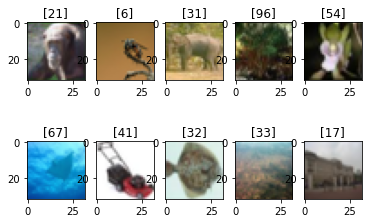

In [ ]:
loc = [34, 55, 19230, 6790, 456, 11234, 45788, 8098, 755, 39769]

for i in range(1, len(loc)+1):
  plt.subplot(2,5,i)
  plt.imshow(x_train[loc[i-1]], cmap = 'gray')
  plt.title(y_train[loc[i-1]])



In [ ]:
temp = []
for i in x_train:
    resized_images = cv2.resize(i, (28,28))
    gray_images = resized_images[:,:,0]
    #ret, b_img = cv2.threshold(gray_images,128,255,cv2. THRESH_BINARY_INV)  
    temp.append(gray_images)
    
gray_images = np.array(temp)  

In [ ]:
gray_images.shape

(50000, 28, 28)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


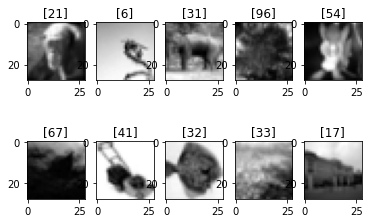

In [ ]:
loc = [34, 55, 19230, 6790, 456, 11234, 45788, 8098, 755, 39769]

for i in range(1, len(loc)+1):
  plt.subplot(2,5,i)
  plt.imshow(gray_images[loc[i-1]], cmap = 'gray')
  plt.title(y_train[loc[i-1]])

In [ ]:
x = gray_images.reshape(-1,28,28,1)
y = to_categorical(y_train)

In [ ]:
x.shape

(50000, 28, 28, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 512)         1

In [ ]:
model.fit(x, y, validation_split=0.1, epochs = 25, batch_size = 64)

Epoch 1/25
704/704 [==============================] - 25s 35ms/step - loss: 4.6001 - accuracy: 0.0116 - val_loss: 4.5732 - val_accuracy: 0.0146
Epoch 2/25
704/704 [==============================] - 24s 34ms/step - loss: 4.5566 - accuracy: 0.0167 - val_loss: 4.9435 - val_accuracy: 0.0148
Epoch 3/25
704/704 [==============================] - 24s 34ms/step - loss: 4.5246 - accuracy: 0.0200 - val_loss: 4.5053 - val_accuracy: 0.0218
Epoch 4/25
704/704 [==============================] - 24s 34ms/step - loss: 4.4674 - accuracy: 0.0205 - val_loss: 4.4706 - val_accuracy: 0.0224
Epoch 5/25
704/704 [==============================] - 24s 34ms/step - loss: 4.3503 - accuracy: 0.0347 - val_loss: 4.3403 - val_accuracy: 0.0386
Epoch 6/25
704/704 [==============================] - 24s 34ms/step - loss: 3.9215 - accuracy: 0.0953 - val_loss: 3.8821 - val_accuracy: 0.1216
Epoch 7/25
704/704 [==============================] - 24s 34ms/step - loss: 3.5033 - accuracy: 0.1650 - val_loss: 3.8099 - val_accuracy:

In [ ]:
model.save('cifar100.h5')
model.save_weights('cifar100_weights.h5')